In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_parquet("../data/subset.parquet")
df.head()


country_text_id    year  v2smorgavgact  project  v2elturnhog  v2ellodiseff  \
0             SWE  1970.0            NaN      0.0          0.0           NaN   
1             SWE  1971.0            NaN      0.0          NaN           NaN   
2             SWE  1972.0            NaN      0.0          NaN           NaN   
3             SWE  1973.0            NaN      0.0          0.0           NaN   
4             SWE  1974.0            NaN      0.0          NaN           NaN   

   v2lgqugen  v2cauni  v2casurv  v2caacadfree  ...  \
0        0.0      1.0     2.866           1.0  ...   
1        0.0      1.0     2.866           1.0  ...   
2        0.0      1.0     2.866           1.0  ...   
3        0.0      1.0     2.866           1.0  ...   
4        0.0      1.0     2.866           1.0  ...   

   INDEX_v2xpas_democracy_opposition  INDEX_v2xpas_religion  \
0                               0.03                  0.036   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                               0.03                  0.037   
4                                NaN                    NaN   

   INDEX_v2xpas_religion_government INDEX_v2xpas_religion_opposition  \
0                             0.075                            0.056   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                             0.075                            0.057   
4                               NaN                              NaN   

   INDEX_v2xpas_exclusion  INDEX_v2xpas_exclusion_government  \
0                   0.141                              0.772   
1                     NaN                                NaN   
2                     NaN                                NaN   
3                   0.138                              0.772   
4                     NaN                                NaN   

   INDEX_v2xpas_exclusion_opposition  INDEX_v2xpas_economic  \
0                              0.785                  0.588   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                              0.791                  0.538   
4                                NaN                    NaN   

   INDEX_v2xpas_economic_government  INDEX_v2xpas_economic_opposition  
0                             0.370                             0.678  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                             0.343                             0.620  
4                               NaN                               NaN  

[5 rows x 623 columns]

In [16]:
cols = ['year', 'country_text_id'] + [
    col for col in df.columns
    if col.startswith('INDEX_')
]
df = df[cols]
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year


In [17]:
df.head()

year country_text_id  INDEX_v2xme_altinf  INDEX_v2xdd_i_rf  \
0  1970             SWE               0.939               0.0   
1  1971             SWE               0.939               0.0   
2  1972             SWE               0.939               0.0   
3  1973             SWE               0.939               0.0   
4  1974             SWE               0.939               0.0   

   INDEX_v2xlg_legcon  INDEX_v2x_clpriv  INDEX_v2xpe_exlsocgr  \
0               0.955             0.931                 0.027   
1               0.955             0.935                 0.027   
2               0.971             0.935                 0.027   
3               0.971             0.950                 0.027   
4               0.971             0.950                 0.024   

   INDEX_v2x_freexp_altinf  INDEX_v2x_gencl  INDEX_v2xed_ed_ptcon  ...  \
0                    0.958            0.896                 0.052  ...   
1                    0.958            0.896                 0.052  ...   
2                    0.957            0.896                 0.052  ...   
3                    0.957            0.937                 0.052  ...   
4                    0.957            0.937                 0.052  ...   

   INDEX_v2xpas_democracy_opposition  INDEX_v2xpas_religion  \
0                               0.03                  0.036   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                               0.03                  0.037   
4                                NaN                    NaN   

   INDEX_v2xpas_religion_government  INDEX_v2xpas_religion_opposition  \
0                             0.075                             0.056   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                             0.075                             0.057   
4                               NaN                               NaN   

   INDEX_v2xpas_exclusion  INDEX_v2xpas_exclusion_government  \
0                   0.141                              0.772   
1                     NaN                                NaN   
2                     NaN                                NaN   
3                   0.138                              0.772   
4                     NaN                                NaN   

   INDEX_v2xpas_exclusion_opposition  INDEX_v2xpas_economic  \
0                              0.785                  0.588   
1                                NaN                    NaN   
2                                NaN                    NaN   
3                              0.791                  0.538   
4                                NaN                    NaN   

   INDEX_v2xpas_economic_government  INDEX_v2xpas_economic_opposition  
0                             0.370                             0.678  
1                               NaN                               NaN  
2                               NaN                               NaN  
3                             0.343                             0.620  
4                               NaN                               NaN  

[5 rows x 123 columns]

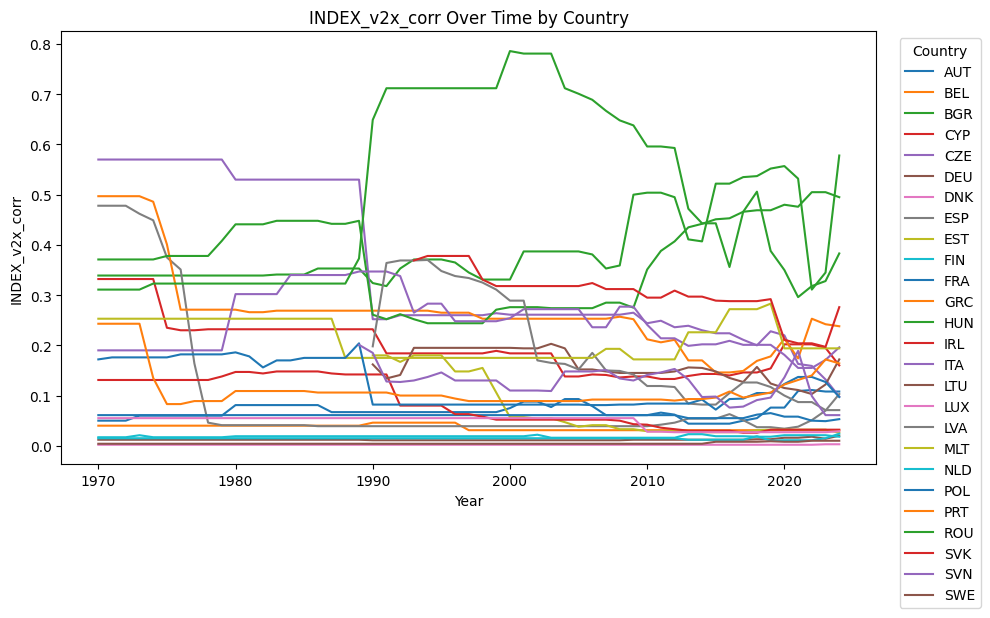

In [18]:
# pivot so each country becomes its own column
pivot = df.pivot(index='year',
                 columns='country_text_id',
                 values='INDEX_v2x_corr')

# plot
ax = pivot.plot(figsize=(10, 6))      # one line per country
ax.set_xlabel('Year')
ax.set_ylabel('INDEX_v2x_corr')
ax.set_title('INDEX_v2x_corr Over Time by Country')
ax.legend(title='Country', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

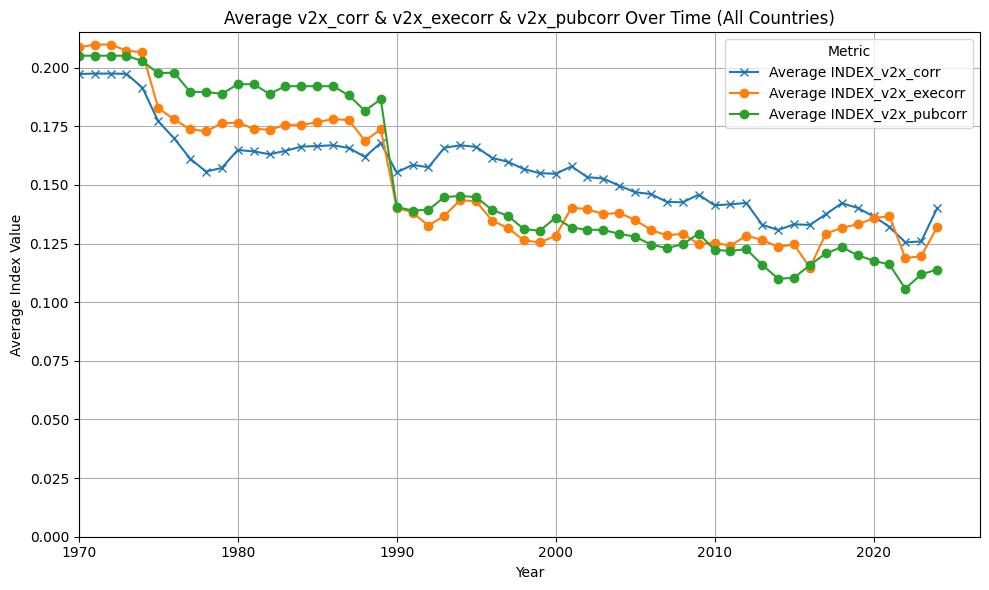

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_parquet("../data/subset.parquet")
cols = ['year', 'country_text_id'] + [
    col for col in df.columns
    if col.startswith('INDEX_')
]
df = df[cols]
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

# 2. Aggregate
agg = (
    df
    .groupby('year')['INDEX_v2x_corr']
    .mean()
    .reset_index()
)
aggexe = (
    df
    .groupby('year')['INDEX_v2x_execorr']
    .mean()
    .reset_index()
)
aggpub = (
    df
    .groupby('year')['INDEX_v2x_pubcorr']
    .mean()
    .reset_index()
)

# 3. Plot both on the same figure
plt.figure(figsize=(10, 6))

plt.plot(
    agg['year'], 
    agg['INDEX_v2x_corr'], 
    marker='x', 
    label='Average INDEX_v2x_corr'
)
plt.plot(
    aggexe['year'], 
    aggexe['INDEX_v2x_execorr'], 
    marker='o', 
    label='Average INDEX_v2x_execorr'
)

plt.plot(
    aggpub['year'], 
    aggpub['INDEX_v2x_pubcorr'], 
    marker='o', 
    label='Average INDEX_v2x_pubcorr'
)
# 4. Axes limits
plt.xlim(left=1970)
plt.ylim(bottom=0)

# 5. Labels, title, legend, grid
plt.xlabel('Year')
plt.ylabel('Average Index Value')
plt.title('Average v2x_corr & v2x_execorr & v2x_pubcorr Over Time (All Countries)')
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()
plt.savefig("corruption_over_time.png", dpi=300)
plt.show()

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Select numeric columns only ---
numeric_df = df.select_dtypes(include=[np.number])

# --- 2. Impute missing values with column means ---
numeric_df = numeric_df.fillna(numeric_df.mean())

# --- 3. Compute correlation matrix ---
corr = numeric_df.corr()

# --- 4. Plot heatmap ---
fig, ax = plt.subplots(figsize=(12, 10))

# display the matrix (default colormap, vmin/vmax fix the scale to [-1,1])
cax = ax.imshow(
    corr.values,
    vmin=-1, vmax=1,
    interpolation='nearest',
    aspect='auto'
)

# set tick positions & labels
ticks = np.arange(len(corr.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns, rotation=90, ha='center')
ax.set_yticklabels(corr.index)

# annotate each cell with its correlation value
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(
            j, i, f"{corr.iat[i, j]:.2f}",
            ha='center', va='center',
            fontsize=8
        )

# add a colorbar and title
fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
ax.set_title('Correlation Matrix of Numeric Variables')

plt.tight_layout()
plt.show()


TypeError: Could not convert ['SWELUXMLTFRAFINROUDNKDEUGRCIRLPRTITACYPBGRNLDHUNAUTCZEESPPOLBELROUPOLDEULUXBELFINFRAHUNIRLGRCESPPRTCYPDNKBGRCZESWEITANLDAUTMLTCYPESPBGRLUXCZEPOLFRAMLTNLDHUNGRCFINIRLAUTROUDEUSWEITADNKBELPRTNLDFRASWEBGRMLTCYPCZELUXGRCDEUITADNKIRLPRTROUFINAUTESPPOLBELHUNITACZENLDDNKCYPSWEBGRPRTLUXBELGRCDEUPOLHUNAUTFRAESPFINMLTIRLROUNLDLUXBGRGRCPOLFRAPRTSWEESPHUNITABELDNKDEUIRLAUTCZECYPMLTROUFINHUNPOLAUTFINCYPGRCMLTSWEBELDNKROULUXIRLCZENLDBGRITAESPDEUPRTFRAESPBELCZEITAGRCHUNDEUSWEDNKFINAUTFRALUXIRLBGRNLDCYPPOLMLTROUPRTROUCYPHUNGRCNLDPRTSWEFINFRADEULUXPOLCZEESPAUTBELDNKBGRITAIRLMLTAUTFINHUNGRCPRTDNKROUDEUNLDIRLSWEBELCZELUXPOLFRAITAESPBGRMLTCYPDNKAUTNLDCYPESPFINFRADEUMLTPOLHUNBGRPRTLUXBELSWEIRLCZEROUITAGRCBGRROUFINIRLFRASWEBELLUXNLDDNKAUTCYPITAPRTESPHUNMLTPOLCZEDEUGRCIRLLUXROUPRTITAGRCBELAUTBGRCZEPOLCYPNLDDNKFINMLTHUNSWEESPDEUFRABELNLDDNKBGRIRLAUTCZECYPESPITAFINROUMLTPOLLUXPRTFRASWEGRCDEUHUNHUNPOLROUAUTCYPESPITAGRCDEUFRAFINNLDBGRIRLDNKCZEPRTSWELUXBELMLTFINIRLHUNITALUXBELNLDGRCCZEAUTBGRCYPPRTSWEESPROUDEUDNKFRAMLTPOLBGRSWEFRACYPHUNMLTPRTAUTIRLFINDNKPOLCZEROUESPGRCDEUITABELLUXNLDNLDFINPOLHUNGRCCZEBGRCYPBELPRTROUDNKLUXFRAITASWEDEUAUTMLTESPIRLPOLPRTIRLMLTROUAUTNLDBELHUNBGRDEULUXFRACYPFINSWEDNKCZEGRCITAESPHUNITANLDGRCSWEMLTCZEDEUROULUXBELBGRCYPAUTFINPOLFRAPRTESPIRLDNKSVNAUTBELCZECYPESTDNKHUNFRALVAIRLPOLSVNLUXLTUNLDBGRMLTGRCROUPRTITASWEFINESPDEUAUTESPROUHUNPOLSVNSWENLDFRALTUCYPLVABGRDNKLUXESTGRCFINCZEPRTBELMLTDEUITAIRLBELHUNLUXBGRSVNNLDLTUDEUESTAUTMLTESPCZEPRTITAIRLGRCSWEDNKPOLLVACYPFINFRAROUCYPESTSVKCZEAUTLUXBELHUNSVNGRCROULTUMLTFINSWEBGRPOLDEUIRLFRAITANLDESPLVAPRTDNKIRLITAESPDNKCZEFRASVNGRCBELNLDLTUBGRAUTCYPLUXLVAFINSWEESTSVKPRTMLTPOLROUDEUHUNPRTLUXGRCHUNCZEITALTUSVNDNKPOLLVAFINSVKROUCYPFRABGRESPBELAUTMLTSWEIRLESTNLDDEUDNKFINESTROUPOLFRABELNLDLVAESPSWEITAPRTLTUAUTIRLGRCBGRHUNLUXCZESVKDEUSVNMLTCYPHUNLTUESPCYPBELPOLFRADEUSVNAUTFINSWELUXITAESTDNKGRCSVKIRLMLTBGRNLDPRTCZELVAROUHUNGRCLVAPOLMLTCZEDEUESTIRLESPITABGRPRTROUSVNLTUAUTNLDSVKDNKFRAFINLUXBELCYPSWEIRLCZEBGRMLTDNKITAESTLTUGRCCYPDEUFINFRAAUTHUNLVABELNLDPOLESPSWELUXROUSVKSVNPRTSVNESTNLDHUNSWEROUDNKCYPDEUBELLTUSVKLUXESPCZEBGRPOLLVAGRCIRLPRTFINFRAITAMLTAUTPOLCYPBGRBELESPITADNKFINSVKMLTAUTLTUSWELUXDEUSVNCZENLDGRCHUNESTPRTFRAROUIRLLVAMLTESTIRLFRAITANLDAUTHUNLUXFINGRCLTUSWEESPCYPSVNDEUBGRDNKCZESVKBELPOLROUPRTLVAFINFRASVKIRLNLDAUTESTCYPGRCPRTLVASVNCZELUXPOLBELROUBGRMLTITASWEHUNDEUDNKLTUESPFINDEUSVNAUTESPSWEDNKHUNIRLFRABGRESTNLDBELCZECYPGRCLVAROULUXMLTSVKLTUPRTITAPOLDNKPOLHUNESPLTUITABELROUDEUESTLUXGRCPRTSWEMLTSVNLVACYPIRLBGRNLDSVKAUTFRAFINCZEFRAGRCESTDEUROUFINAUTLUXHUNPRTSVNBELNLDLVACZEPOLCYPIRLMLTSWEDNKITALTUESPBGRSVKPOLSVNLUXMLTROUFRASVKHUNESTDEUGRCLTUPRTSWEITAESPCZECYPAUTNLDDNKBELLVABGRIRLFINAUTDNKCZEESPMLTBGRSVKIRLLUXFINNLDSVNLVAROUSWEESTLTUPOLBELFRAITADEUHUNPRTCYPGRCSVNGRCCZEHUNESPPOLAUTFINITANLDIRLSVKDEUCYPMLTESTFRADNKBGRPRTLTULUXBELLVASWEROUESPSVKROUESTAUTSWESVNNLDBELPRTFRAHUNDEULUXLTUDNKGRCITABGRCYPFINLVACZEPOLIRLMLTGRCCZELTULUXHUNMLTITAROUPOLFRAPRTDNKSVKIRLLVACYPDEUBGRESPSWESVNNLDAUTBELESTFINPOLSVKHUNLVAESPESTPRTCYPDEUNLDDNKMLTITAFRASWEFINLTUGRCIRLAUTLUXBGRSVNCZEROUBELLVAMLTPOLSWEDEUESTHUNSVKFINCYPLTUDNKFRABGRPRTROUITABELGRCESPLUXAUTNLDCZESVNIRLPRTITAPOLCZEBELAUTHUNLVALUXMLTROUBGRIRLSVNSWECYPSVKDNKESPFINESTDEUFRAGRCLTUNLDCZEAUTROUGRCLUXBELFINDEUMLTBGRPOLIRLLVADNKSWESVNESTESPFRANLDITACYPPRTLTUSVKHUNESTSVKLTUMLTCYPDEUHUNIRLLUXFINPOLNLDSWEPRTSVNROUAUTCZEFRAGRCLVABGRESPBELDNKITAAUTCZENLDROUMLTSWELTUESTGRCPRTDEULVALUXIRLSVNPOLFRASVKDNKCYPBGRBELITAHUNFINESPSVNSWEBELLUXIRLPRTCYPLVAROUAUTNLDSVKITAESPDEULTUHUNCZEPOLESTMLTGRCFRAFINBGRDNKCYPSWEAUTIRLSVKGRCLUXITAROUCZEMLTESPPRTPOLLVAESTHUNBGRNLDSVNFRADEULTUFINDNKBELHUNIRLSVNESPFINESTNLDCYPCZESVKSWEFRAAUTPOLBGRBELLTUMLTPRTLUXLVAITADEUGRCROUDNKDNKSVNFRAFINBGRAUTROUBELITAPRTLUXLTUCZEESPESTDEUNLDPOLSWEIRLHUNSVKCYPGRCLVAMLTSWEESTDEUNLDBGRDNKFINPOLHUNSVNBELMLTESPGRCAUTLUXCZEFRAIRLPRTLTUCYPROULVAITASVKLVAESTIRLAUTHUNFINCYPLTUPRTBGRESPNLDGRCSVKPOLSVNLUXROUBELDEUSWEFRACZEITAMLTDNKGRCCZEFRAIRLCYPDEUNLDBGRDNKESTFINESPLUXSWEAUTLVASVNSVKROUPRTITABELMLTPOLLTUHUN'] to numeric

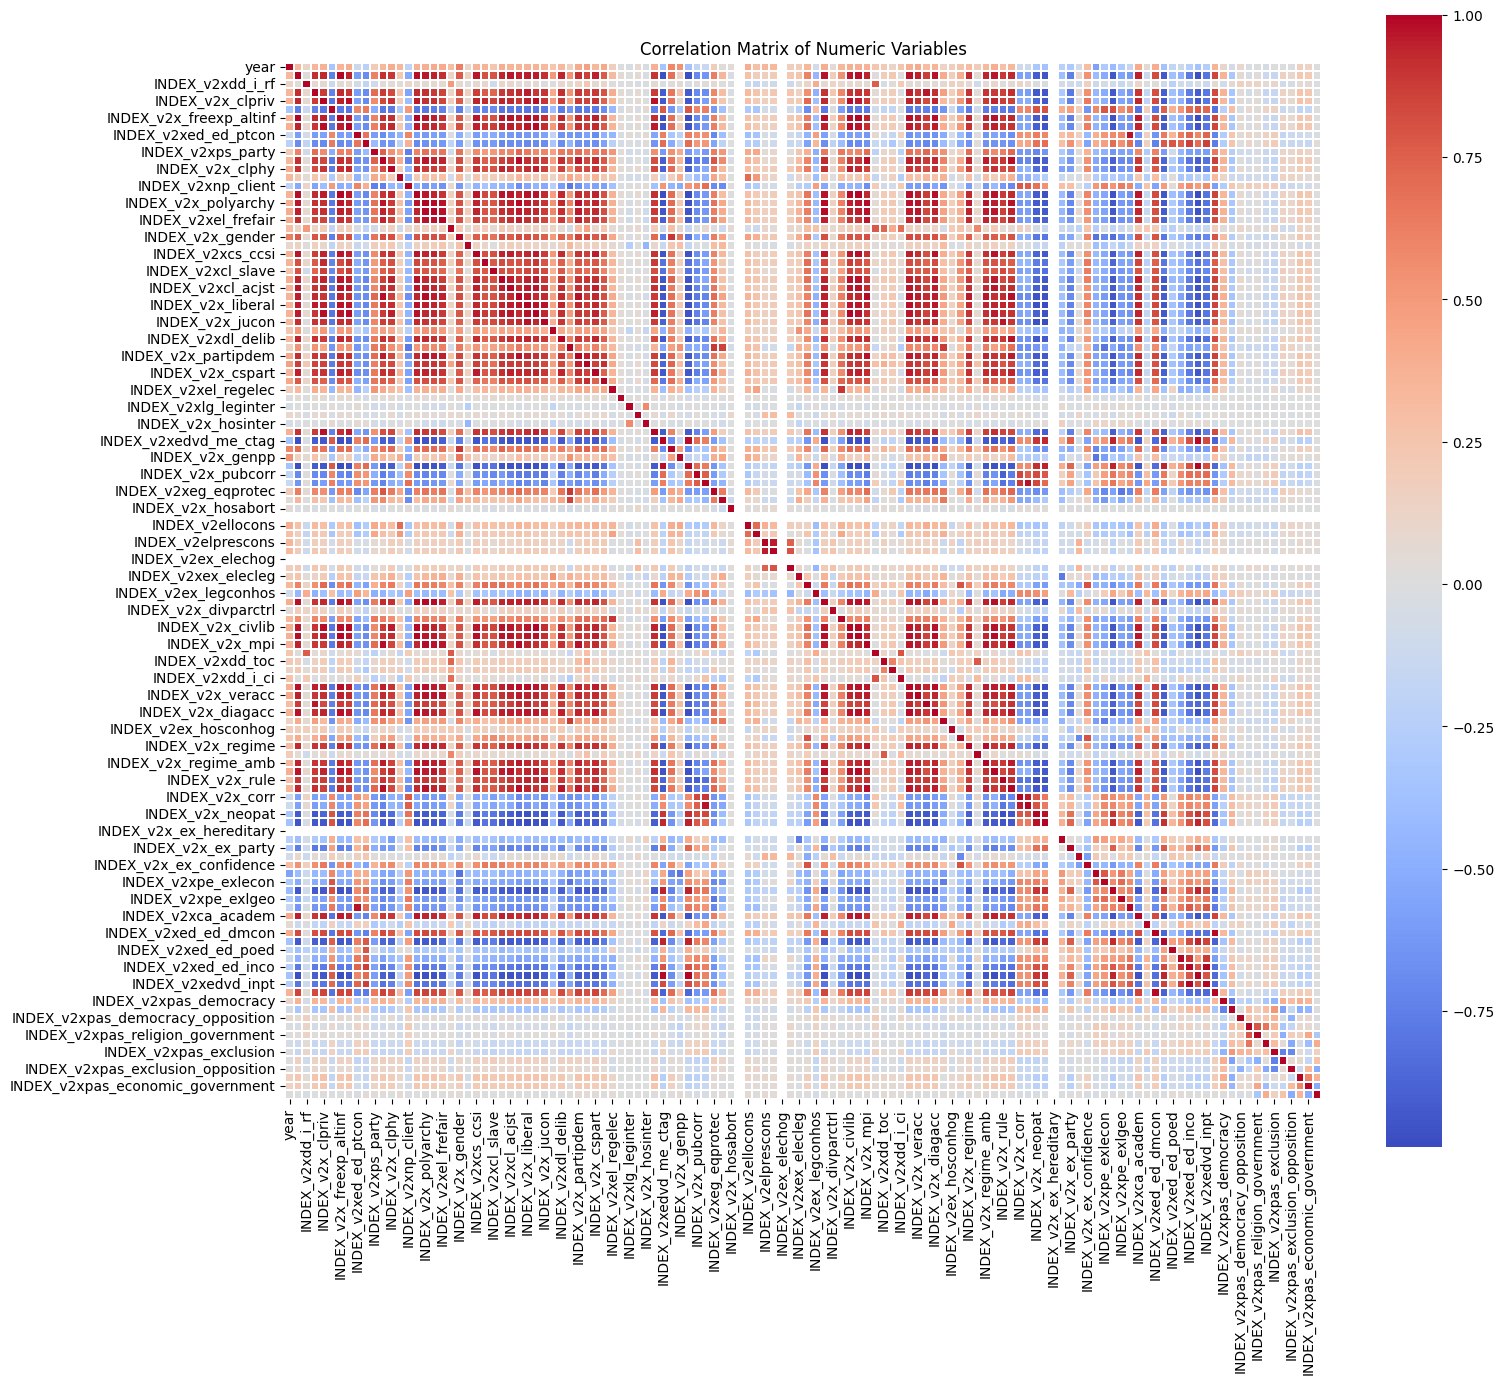

In [40]:
# Plot correlation heatmap for indices
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/subset.parquet")

cols = ['year', 'country_text_id'] + [
    col for col in df.columns
    if col.startswith('INDEX_')
]

df = df[cols]

df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

# 1. Select numeric columns and fill missing values with the column means
numeric_df = df.select_dtypes(include=['number']).fillna(df.select_dtypes(include=['number']).mean())

# 2. Compute the correlation matrix
corr = numeric_df.corr()

# 3. Plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr,
    fmt=".2f",         # two decimal places
    cmap='coolwarm',   # diverging map from blue to red
    linewidths=0.1,    # lines between cells
    square=True        # square cells
)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()


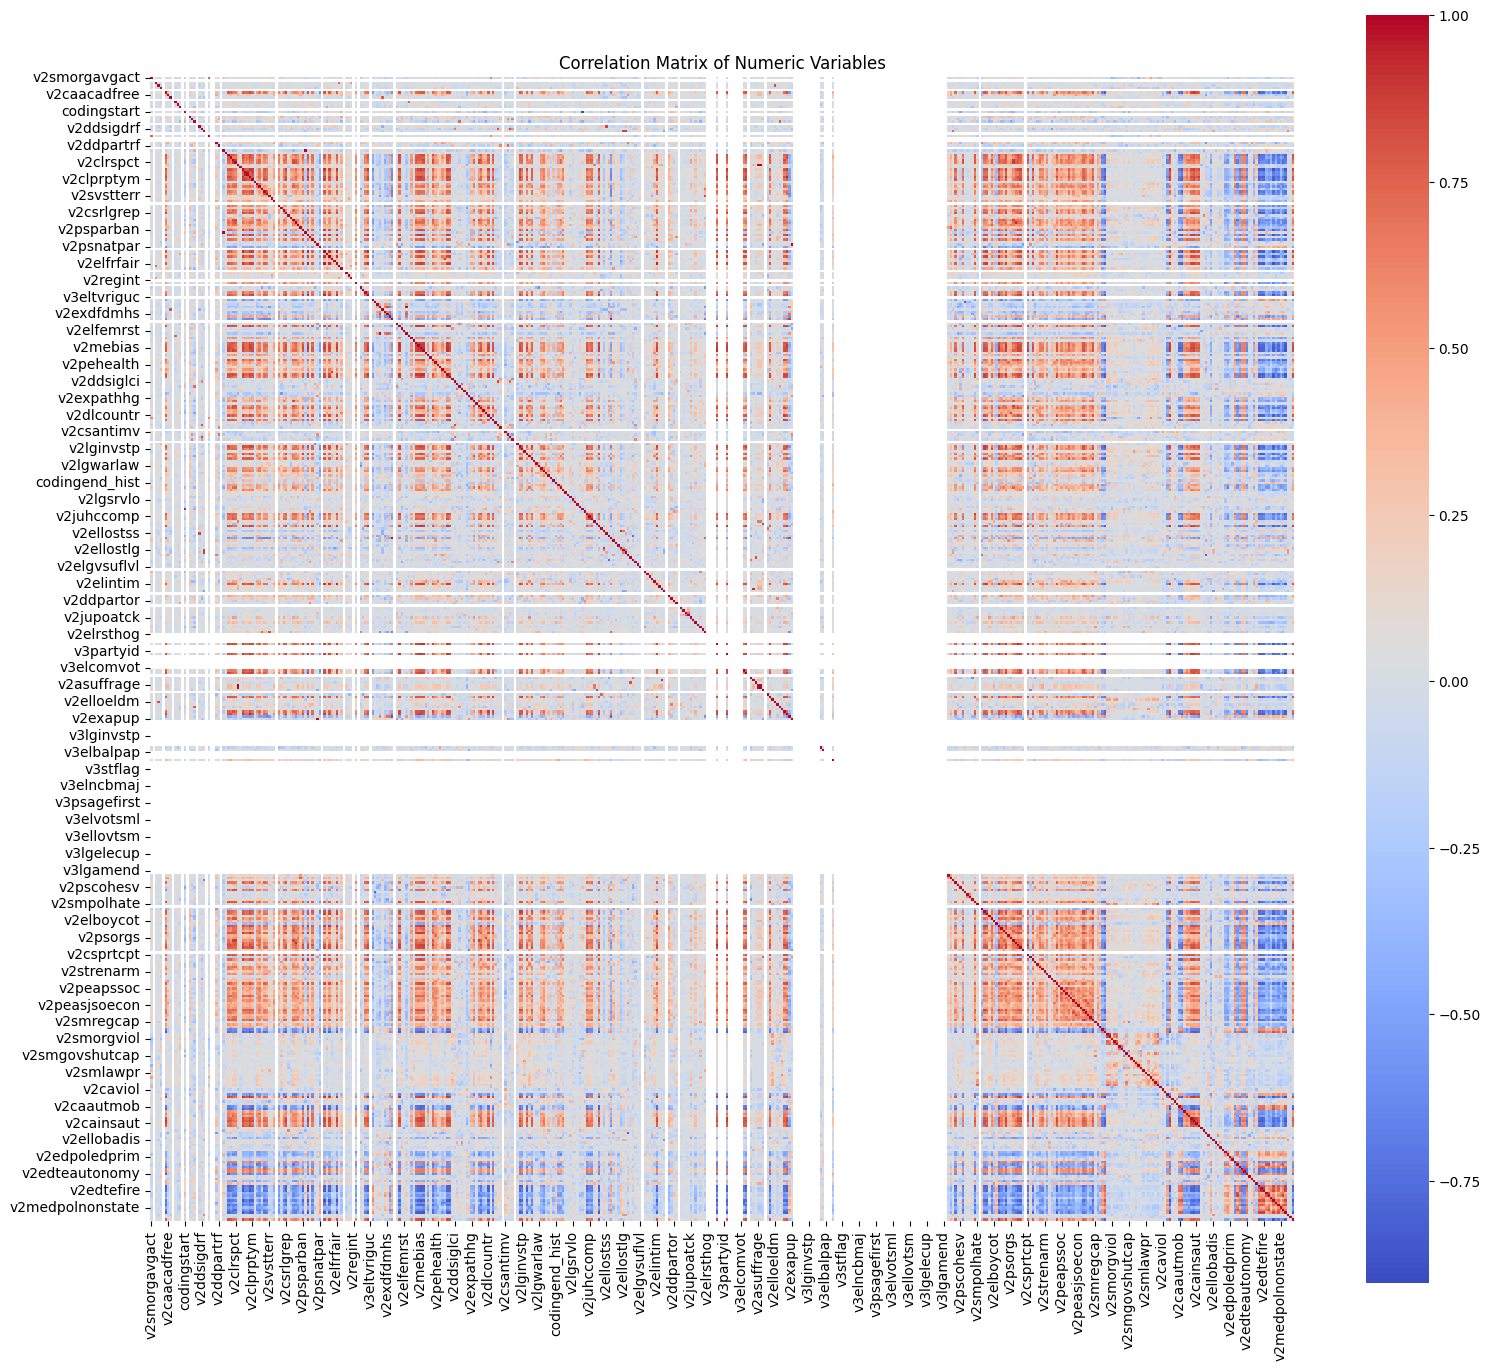

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Load
df = pd.read_parquet("../data/subset_numeric.parquet")

# 1. Drop any INDEX_* columns up-front
df = df.drop(columns=[c for c in df.columns if c.startswith('INDEX_')])

# 2. Convert all remaining data columns (i.e. everything except year/country_text_id) to numeric
data_cols = [c for c in df.columns if c not in ('year','country_text_id')]
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors='coerce')

# 3. (Optional) parse year if it’s not already int
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce').dt.year

# 4. Build your numeric-only DataFrame, filling NaNs with column means
numeric_df = (
    df[data_cols]
    .fillna(df[data_cols].mean())
)

# 5. Correlation + heatmap
corr = numeric_df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0,
    square=True
)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()


In [50]:
len(data_cols)

596

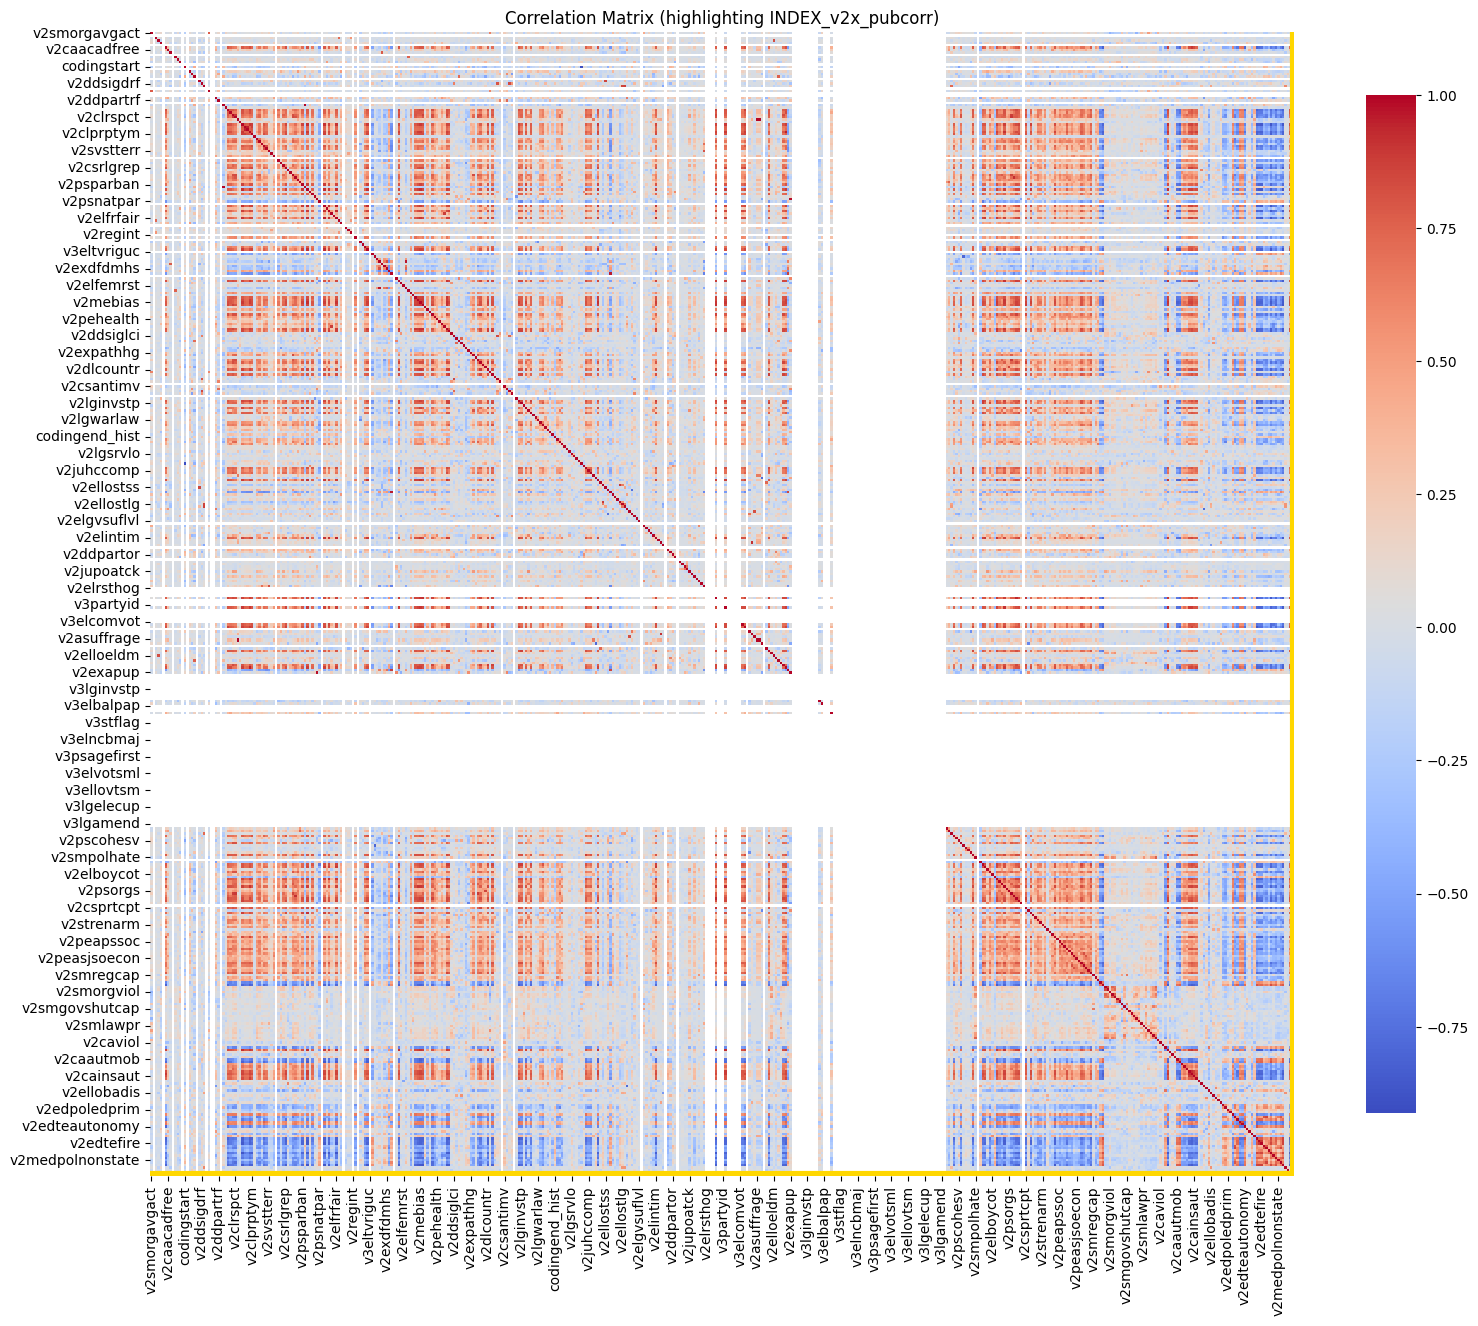

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 0. Load
df = pd.read_parquet("../data/subset_numeric.parquet")

# 1. Identify the INDEX_ columns, but keep only INDEX_v2x_pubcorr
all_index_cols = [c for c in df.columns if c.startswith('INDEX_')]
keep_index = "INDEX_v2x_pubcorr"
drop_these = [c for c in all_index_cols if c != keep_index]
df = df.drop(columns=drop_these)

# 2. Convert all data columns (except identifiers) to numeric
data_cols = [c for c in df.columns if c not in ('year','country_text_id')]
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors='coerce')

# 3. Parse year if needed
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce').dt.year

# 4. Fill NaNs in data columns
numeric_df = df[data_cols].fillna(df[data_cols].mean())

# 5. Compute correlation matrix
corr = numeric_df.corr()

# 6. Plot heatmap
plt.figure(figsize=(16, 14))
ax = sns.heatmap(
    corr,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0,
    square=True,
    cbar_kws={'shrink': .8}
)
plt.title('Correlation Matrix (highlighting INDEX_v2x_pubcorr)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# 7. Highlight the row & column for INDEX_v2x_pubcorr
idx = corr.columns.get_loc(keep_index)
# a) highlight the full row
ax.add_patch(patches.Rectangle(
    (0, idx),                # (x,y) lower-left corner in data coords
    corr.shape[0],           # width
    1,                       # height of one row
    fill=False,
    edgecolor='gold',
    lw=3
))
# b) highlight the full column
ax.add_patch(patches.Rectangle(
    (idx, 0),                # (x,y) lower-left corner
    1,                       # width of one column
    corr.shape[0],           # height
    fill=False,
    edgecolor='gold',
    lw=3
))

plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load & prep (you’ve already got this)
df = pd.read_parquet("../data/subset_numeric.parquet")

# keep only the one INDEX_ you care about
keep_index = "INDEX_v2x_pubcorr"
data_cols = [c for c in df.columns if c not in ('year','country_text_id')]
index_cols = [c for c in data_cols if c.startswith('INDEX_')]
# drop all INDEX_ except your target
drop_cols = [c for c in index_cols if c != keep_index]
df = df.drop(columns=drop_cols)

# coerce to numeric + fill NAs
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors='coerce')
df[data_cols] = df[data_cols].fillna(df[data_cols].mean())

# compute the “one‐vs‐all” correlations
corr_with_pubcorr = df[data_cols].corr()[keep_index].drop(labels=[keep_index])

# sort by strength (absolute or signed as you prefer)
corr_with_pubcorr = corr_with_pubcorr.sort_values()  # ascending: neg at top

# plot
plt.figure(figsize=(8, len(corr_with_pubcorr) * 0.25))
sns.barplot(
    x=corr_with_pubcorr.values,
    y=corr_with_pubcorr.index,
    palette='coolwarm',      # blue=neg, red=pos
)
plt.axvline(0, color='k', linewidth=0.8)
plt.title("Correlation of Variables with INDEX_v2x_pubcorr")
plt.xlabel("Pearson r")
plt.ylabel("")
plt.tight_layout()
plt.show()


KeyError: "['INDEX_v2xme_altinf', 'INDEX_v2xdd_i_rf', 'INDEX_v2xlg_legcon', 'INDEX_v2x_clpriv', 'INDEX_v2xpe_exlsocgr', 'INDEX_v2x_freexp_altinf', 'INDEX_v2x_gencl', 'INDEX_v2xed_ed_ptcon', 'INDEX_v2xed_ed_inpt', 'INDEX_v2xps_party', 'INDEX_v2x_egaldem', 'INDEX_v2x_clphy', 'INDEX_v2regdur', 'INDEX_v2xnp_client', 'INDEX_v2x_freexp', 'INDEX_v2x_polyarchy', 'INDEX_v2x_EDcomp_thick', 'INDEX_v2xel_frefair', 'INDEX_v2xdd_dd', 'INDEX_v2x_gender', 'INDEX_v2x_suffr', 'INDEX_v2xcs_ccsi', 'INDEX_v2xcl_dmove', 'INDEX_v2xcl_slave', 'INDEX_v2xcl_disc', 'INDEX_v2xcl_acjst', 'INDEX_v2x_libdem', 'INDEX_v2x_liberal', 'INDEX_v2xcl_rol', 'INDEX_v2x_jucon', 'INDEX_v2x_elecoff', 'INDEX_v2xdl_delib', 'INDEX_v2x_egal', 'INDEX_v2x_partipdem', 'INDEX_v2x_partip', 'INDEX_v2x_cspart', 'INDEX_v2xel_locelec', 'INDEX_v2xel_regelec', 'INDEX_v2xel_elecparl', 'INDEX_v2xlg_leginter', 'INDEX_v2xel_elecpres', 'INDEX_v2x_hosinter', 'INDEX_v2xcl_prpty', 'INDEX_v2xedvd_me_ctag', 'INDEX_v2x_gencs', 'INDEX_v2x_genpp', 'INDEX_v2xedvd_me_cent', 'INDEX_v2x_execorr', 'INDEX_v2xeg_eqprotec', 'INDEX_v2xeg_eqdr', 'INDEX_v2x_hosabort', 'INDEX_v2x_legabort', 'INDEX_v2ellocons', 'INDEX_v2ellocumul', 'INDEX_v2elprescons', 'INDEX_v2elprescumul', 'INDEX_v2ex_elechog', 'INDEX_v2ex_elechos', 'INDEX_v2xex_elecleg', 'INDEX_v2ex_legconhog', 'INDEX_v2ex_legconhos', 'INDEX_v2x_api', 'INDEX_v2x_divparctrl', 'INDEX_v2x_feduni', 'INDEX_v2x_civlib', 'INDEX_v2x_clpol', 'INDEX_v2x_mpi', 'INDEX_v2xdd_cic', 'INDEX_v2xdd_toc', 'INDEX_v2xdd_i_or', 'INDEX_v2xdd_i_ci', 'INDEX_v2x_accountability', 'INDEX_v2x_veracc', 'INDEX_v2x_horacc', 'INDEX_v2x_diagacc', 'INDEX_v2xeg_eqaccess', 'INDEX_v2ex_hosconhog', 'INDEX_v2ex_hogw', 'INDEX_v2x_regime', 'INDEX_v2xdd_i_pl', 'INDEX_v2x_regime_amb', 'INDEX_v2x_frassoc_thick', 'INDEX_v2x_rule', 'INDEX_v2x_delibdem', 'INDEX_v2x_corr', 'INDEX_v2xnp_regcorr', 'INDEX_v2x_neopat', 'INDEX_v2xnp_pres', 'INDEX_v2x_ex_hereditary', 'INDEX_v2x_ex_military', 'INDEX_v2x_ex_party', 'INDEX_v2x_ex_direlect', 'INDEX_v2x_ex_confidence', 'INDEX_v2xpe_exlgender', 'INDEX_v2xpe_exlecon', 'INDEX_v2xpe_exlpol', 'INDEX_v2xpe_exlgeo', 'INDEX_v2xed_ptcon', 'INDEX_v2xca_academ', 'INDEX_v2regidnr', 'INDEX_v2xed_ed_dmcon', 'INDEX_v2xed_ed_ctag', 'INDEX_v2xed_ed_poed', 'INDEX_v2xed_ed_cent', 'INDEX_v2xed_ed_inco', 'INDEX_v2xedvd_me_inco', 'INDEX_v2xedvd_inpt', 'INDEX_v2xed_ed_con', 'INDEX_v2xpas_democracy', 'INDEX_v2xpas_democracy_government', 'INDEX_v2xpas_democracy_opposition', 'INDEX_v2xpas_religion', 'INDEX_v2xpas_religion_government', 'INDEX_v2xpas_religion_opposition', 'INDEX_v2xpas_exclusion', 'INDEX_v2xpas_exclusion_government', 'INDEX_v2xpas_exclusion_opposition', 'INDEX_v2xpas_economic', 'INDEX_v2xpas_economic_government', 'INDEX_v2xpas_economic_opposition'] not in index"

/var/folders/mz/h0xxdjw17gs4nw0d1t3zh6t00000gn/T/ipykernel_24375/3395947045.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


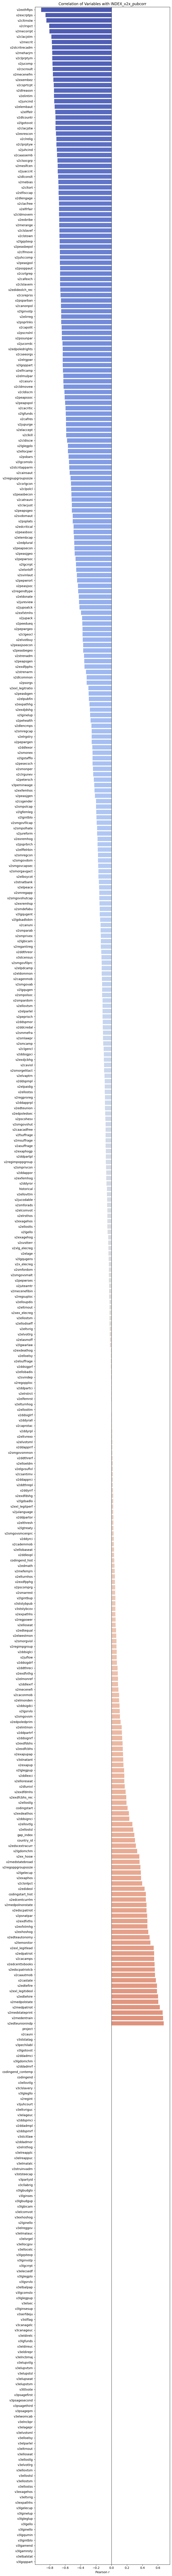

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Load
df = pd.read_parquet("../data/subset_numeric.parquet")

# 1. Identify all INDEX_ columns, but plan to keep just your target
keep_index = "INDEX_v2x_pubcorr"
all_index_cols = [c for c in df.columns if c.startswith("INDEX_")]
drop_index_cols = [c for c in all_index_cols if c != keep_index]

# 2. Drop the unwanted INDEX_ columns
df = df.drop(columns=drop_index_cols)

# 3. Now recompute your data columns (everything except the two identifiers)
data_cols = [c for c in df.columns if c not in ("year", "country_text_id")]

# 4. Force them to numeric, coercing errors → NaN
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors="coerce")

# 5. Fill those NaNs with each column’s mean
df[data_cols] = df[data_cols].fillna(df[data_cols].mean())

# 6. (Optional) clean up year
df["year"] = pd.to_datetime(df["year"], format="%Y", errors="coerce").dt.year

# 7. Compute one‐vs‐all correlations
corr_with_pubcorr = df[data_cols].corr()[keep_index].drop(labels=[keep_index])

# 8. Plot as a horizontal bar chart
corr_with_pubcorr = corr_with_pubcorr.sort_values()
plt.figure(figsize=(8, len(corr_with_pubcorr) * 0.25))
sns.barplot(
    x=corr_with_pubcorr.values,
    y=corr_with_pubcorr.index,
    palette="coolwarm"
)
plt.axvline(0, color="k", linewidth=0.8)
plt.title("Correlation of Variables with INDEX_v2x_pubcorr")
plt.xlabel("Pearson r")
plt.ylabel("")
plt.tight_layout()
plt.show()


/var/folders/mz/h0xxdjw17gs4nw0d1t3zh6t00000gn/T/ipykernel_24375/2743262795.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


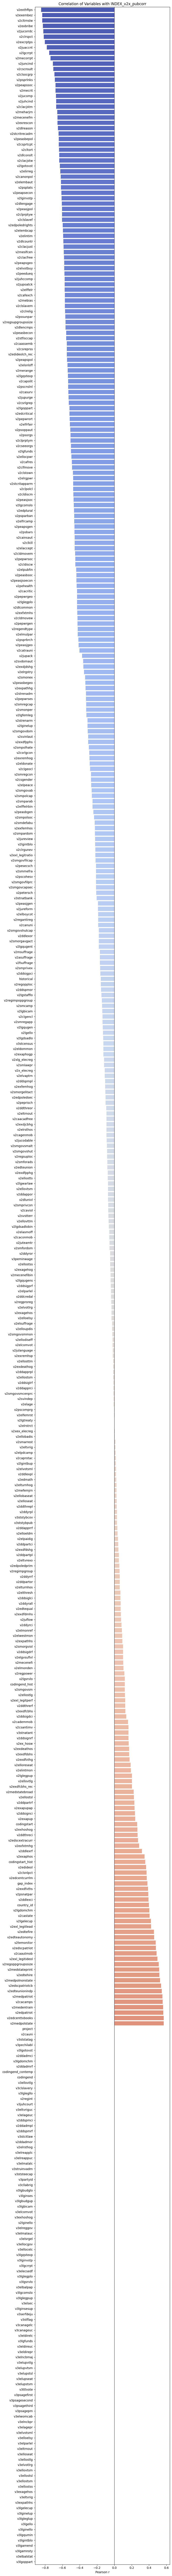

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Load
df = pd.read_parquet("../data/subset_numeric.parquet")

# 1. Identify all INDEX_ columns, but plan to keep just your target
keep_index = "INDEX_v2x_corr"
all_index_cols = [c for c in df.columns if c.startswith("INDEX_")]
drop_index_cols = [c for c in all_index_cols if c != keep_index]

# 2. Drop the unwanted INDEX_ columns
df = df.drop(columns=drop_index_cols)

# 3. Now recompute your data columns (everything except the two identifiers)
data_cols = [c for c in df.columns if c not in ("year", "country_text_id")]

# 4. Force them to numeric, coercing errors → NaN
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors="coerce")

# 5. Fill those NaNs with each column’s mean
df[data_cols] = df[data_cols].fillna(df[data_cols].mean())

# 6. (Optional) clean up year
df["year"] = pd.to_datetime(df["year"], format="%Y", errors="coerce").dt.year

# 7. Compute one‐vs‐all correlations
corr_with_pubcorr = df[data_cols].corr()[keep_index].drop(labels=[keep_index])

# 8. Plot as a horizontal bar chart
corr_with_pubcorr = corr_with_pubcorr.sort_values()
plt.figure(figsize=(8, len(corr_with_pubcorr) * 0.25))
sns.barplot(
    x=corr_with_pubcorr.values,
    y=corr_with_pubcorr.index,
    palette="coolwarm"
)
plt.axvline(0, color="k", linewidth=0.8)
plt.title("Correlation of Variables with INDEX_v2x_pubcorr")
plt.xlabel("Pearson r")
plt.ylabel("")
plt.tight_layout()
plt.show()


/var/folders/mz/h0xxdjw17gs4nw0d1t3zh6t00000gn/T/ipykernel_24375/1790212913.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


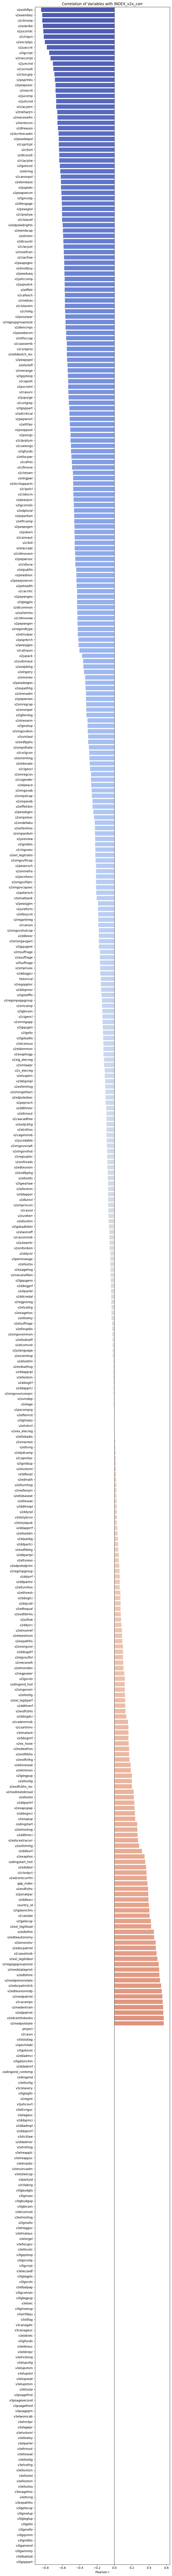

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. Load
df = pd.read_parquet("../data/subset_numeric.parquet")

# 1. Identify all INDEX_ columns, but plan to keep just your target
keep_index = "INDEX_v2x_corr"
all_index_cols = [c for c in df.columns if c.startswith("INDEX_")]
drop_index_cols = [c for c in all_index_cols if c != keep_index]

# 2. Drop the unwanted INDEX_ columns
df = df.drop(columns=drop_index_cols)

# 3. Now recompute your data columns (everything except the two identifiers)
data_cols = [c for c in df.columns if c not in ("year", "country_text_id")]

# 4. Force them to numeric, coercing errors → NaN
df[data_cols] = df[data_cols].apply(pd.to_numeric, errors="coerce")

# 5. Fill those NaNs with each column’s mean
df[data_cols] = df[data_cols].fillna(df[data_cols].mean())

# 6. (Optional) clean up year
df["year"] = pd.to_datetime(df["year"], format="%Y", errors="coerce").dt.year

# 7. Compute one‐vs‐all correlations
corr_with_pubcorr = df[data_cols].corr()[keep_index].drop(labels=[keep_index])

# 8. Plot as a horizontal bar chart
corr_with_pubcorr = corr_with_pubcorr.sort_values()
plt.figure(figsize=(8, len(corr_with_pubcorr) * 0.25))
sns.barplot(
    x=corr_with_pubcorr.values,
    y=corr_with_pubcorr.index,
    palette="coolwarm"
)
plt.axvline(0, color="k", linewidth=0.8)
plt.title("Correlation of Variables with INDEX_v2x_corr")
plt.xlabel("Pearson r")
plt.ylabel("")
plt.tight_layout()
plt.show()
